# Ejercicio 13: Resolver una EDO

## Sebastián Tapia

## P3

Resolver y graficar los resultados de la siguiente EDO usando los métodos vistos en clases:
 $$f(t, y) = y'(t) = v_0 - gt$$

 Donde:
 - $t$ es el tiempo
 - $y$ es la altura de un proyectil
 - $v_0$ es la velocidad vertical inicial
 - $t_0 = 0$ tiempo inicial
 - $y_0 = 0$ altura inicial
 - $g$ es la aceleración de gravedad
 - Asumiremos velocidad constante


## Método de Euler

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h(v_0 -gt)$


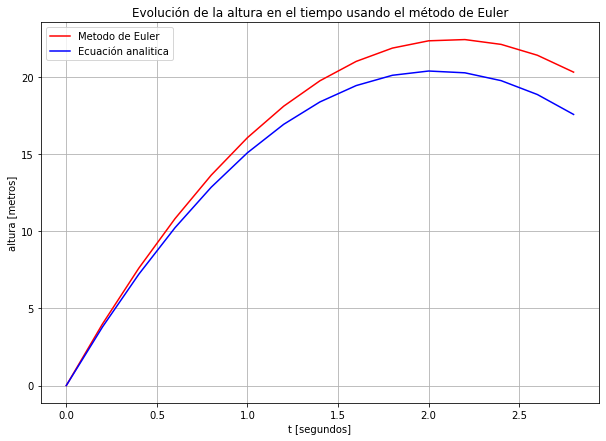

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1])

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando el método de Euler')
ax.legend()
ax.grid()

plt.show()

## Método de Series de Taylor

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h T_2(t_i, y_i)$

Donde:

$$
T_2(t_i, y_i) = f(t_i, y_i) + \frac{1}{2!}h^2f'(t_i,y_i)
$$

$$
f'(t, y) = \frac{\partial}{\partial{t}}f(t, y) + \frac{\partial}{\partial{y}}f(t, y)\frac{\partial{y}}{\partial{t}}
$$

Por lo tanto:

$$
T_2(t_i, y_i) = (v_0 -gt_i) + \frac{1}{2!}h^2(- g + (v_0 -gt_i))
$$

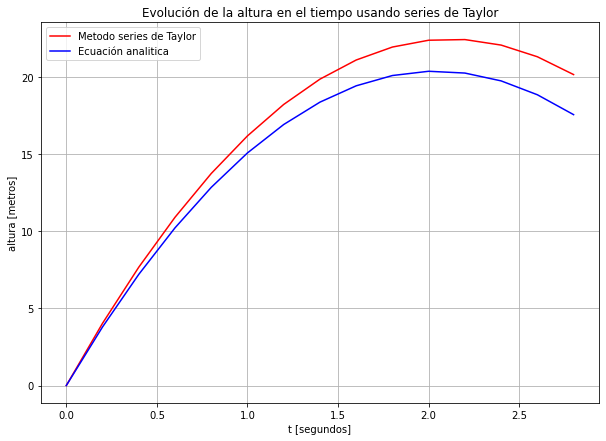

In [14]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t + (1/2)*h*h*( -g + (v0 - g*t))

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1])

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo series de Taylor')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando series de Taylor')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta 2 - Euler Modificado

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h F(t_i, y_i)$

Donde:

$$
F(t_i, y_i) = w_1f(t_i, y_i) + w_2f(t_i + ah, y_i +ahf(x_i, y_i))
$$

Como es la versión Euler modificado: $a=\frac{1}{2}$, $w_1=0$ y $w_2= 1$

Por lo tanto:

$$
F(t_i, y_i) = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}f(t_i, y_i)) = v_0 -g(t_i + \frac{h}{2})
$$

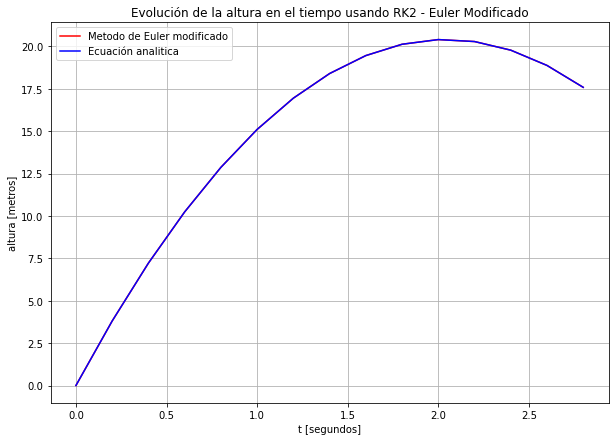

In [15]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1] + h/2)

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler modificado')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK2 - Euler Modificado')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta 2 - Euler Mejorado

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h F(t_i, y_i)$

Donde:

$$
F(t_i, y_i) = w_1f(t_i, y_i) + w_2f(t_i + ah, y_i +ahf(x_i, y_i))
$$

Como es la versión Euler mejorado: $a=1$, $w_1= w_2= 0.5$

Por lo tanto:

$$
F(t_i, y_i) = \frac{1}{2}f(t_i, y_i) + f(t_i + h, y_i +f(t_i, y_i)) = \frac{1}{2}(v_0 -gt_i + v_0 -g(t_i + h))
$$

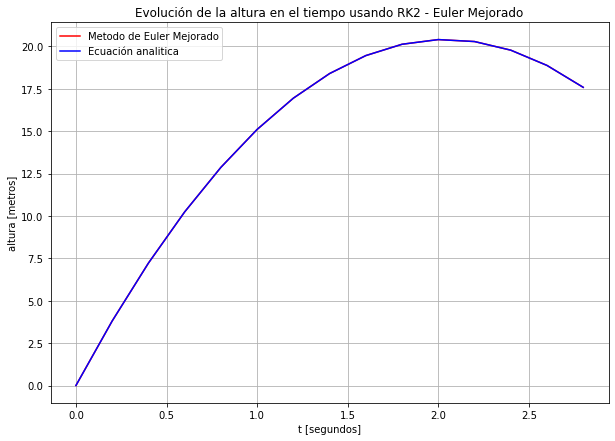

In [16]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + (h/2)*( function(t_values[i - 1]) + function(t_values[i - 1] + h) )

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler Mejorado')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK2 - Euler Mejorado')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta de 4 etapas

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + \frac{h}{6}\left[K_1(t_i, y_i) + 2K_2(t_i, y_i) + 2K_3(t_i, y_i) + K_4(t_i, y_i)\right]$

Donde:

$$
K_1(t_i, y_i) = f(t_i, y_i) = v_0 -gt_i
$$

$$
K_2(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1(t_i, y_i)\right) = v_0 -g\left(t_i +\frac{h}{2}\right)
$$

$$
K_3(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_2(t_i, y_i)\right) = v_0 -g\left(t_i +\frac{h}{2}\right)
$$

$$
K_4(t_i, y_i) = f\left(t_i + h, y_i + hK_3(t_i, y_i)\right) = v_0 -g(t_i+ h)
$$


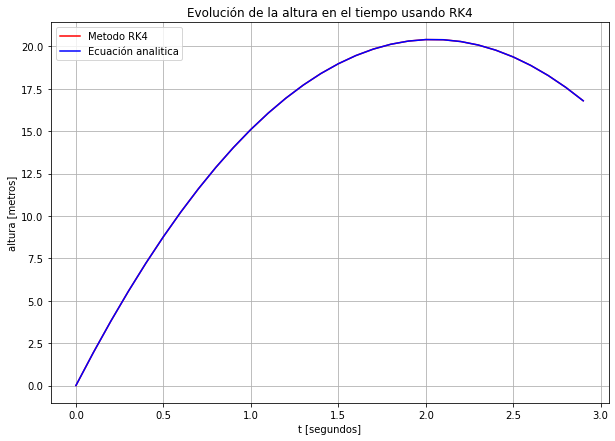

In [17]:
h = 0.1
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        k1 = function(t_values[i - 1])
        k2 = function(t_values[i - 1] + (h/2))
        k3 = function(t_values[i - 1] + (h/2))
        k4 = function(t_values[i - 1] + h)

        y_values[i] = y_values[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo RK4')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK4')
ax.legend()
ax.grid()

plt.show()

## Solución de un sistema de EDOs

Sea el sistema:

\begin{equation}
\frac{dx}{dt} = f(x,y,t)
\qquad
\qquad
\qquad
\frac{dy}{dt} = g(x,y,t)
\end{equation}

Con condiciones iniciales:
\begin{equation}
x(t_0) = x_0
\qquad
\qquad
\qquad
y(t_0) = y_0
\end{equation}

El procedimiento del método de Runge-Kutta es generar los valores a través de iteraciones, en donde cada una de ellas se realizan los cálculos de la tabla siguiente, siguiendo el orden de las filas. Con estos se obtienen los valores para un tiempo ``t + h`` a partir de los ya obtenidos para ``t``.

<div style="width:290px">Primera ecuación   </div>          | <div style="width:290px">Segunda ecuación   </div> 
:--------------------------|:--------------------------
$\frac{dx}{dt} = f(x,y,t)$ | $\frac{dy}{dt} = g(x,y,t)$ 
Calcular          | Calcular
$k_1 = hf(x, y, t)$                                               | $l_1 = hg(x, y, t)$   
$k_2 = hf(x + \frac{k_1}{2}, y + \frac{l_1}{2}, t + \frac{h}{2})$ | $l_2 = hg(x + \frac{k_1}{2}, y + \frac{l_1}{2}, t + \frac{h}{2})$ 
$k_3 = hf(x + \frac{k_2}{2}, y + \frac{l_2}{2}, t + \frac{h}{2})$ | $l_3 = hg(x + \frac{k_2}{2}, y + \frac{l_2}{2}, t + \frac{h}{2})$
$k_4 = hf(x + k_3, y +l_3, t + h)$                                | $l_4 = hg(x + k_3, y +l_3, t + h)$  
$x(t+h)=x(t) +\frac{1}{6}(k_1 + 2k_2 + 2k_3+k_4)\qquad$           | $y(t+h) = y(t) + \frac{1}{6}(l_1 + 2l_2 +2l_3 + l_4)$

## Solución de EDOS de orden 2

Una ecuación diferencial de segundo orden es equivalente a un sistema de dos ecuaciones diferenciales de primer orden, por lo que aplicaremos la misma metodología anterior.

Sea el sistema

\begin{equation}
\frac{d^2x}{dt^2} = f(x,v,t)
\end{equation}

Con condiciones iniciales:
\begin{equation}
x(t_0) = x_0
\qquad
\qquad
\qquad
\left( \frac{dx}{dt} \right)_{t_0} = v_0
\end{equation}

Luego se ejecuta el mismo procedimiento anterior, considerando que ahora las variables de la primera columna $k_1$, $k_2$, $k_3$, $k_4$ se calculan directamente con $v$ ya obtenido, en vez de tener que evaluar una función.

<div style="width:290px">Primera ecuación   </div>            | <div style="width:290px">Segunda ecuación   </div>  
:--------------------------|:--------------------------
$\frac{dx}{dt} = v$ | $\frac{dv}{dt} = f(x,v,t)$ 
Calcular          | Calcular
$k_1 = hv$                                               | $l_1 = hf(x, y, t)$   
$k_2 = h(v + \frac{l_1}{2}) $                            | $l_2 = hf(x + \frac{k_1}{2}, v + \frac{l_1}{2}, t + \frac{h}{2})$ 
$k_3 = h(v + \frac{l_2}{2})$                             | $l_3 = hf(x + \frac{k_2}{2}, v + \frac{l_2}{2}, t + \frac{h}{2})$
$k_4 = h(v + l_3)$                                       | $l_4 = hf(x + k_3, v +l_3, t + h)$  
$x(t+h)=x(t) +\frac{1}{6}(k_1 + 2k_2 + 2k_3+k_4)\qquad$  | $v(t+h) = v(t) + \frac{1}{6}(l_1 + 2l_2 +2l_3 + l_4)$

## Ejercicio
Resolver y graficar los resultados de la siguiente EDO usando los metodos de Euler, Series de Taylor y RK4:

$$y'(t) = -2y(t) + \cos(4t)$$

con condición inicial $y_0 = 3$, donde por cada metodo debe generar un grafico con al menos tres curvas que representen 
distintos valores de $h$ tal que las lineas dibujadas representen a $y(t)$ con diferente presicion, ejemplo: resolver para $h = 0.8$, $h = 0.2$ y $h = 0.02$ con $t\in(0, 2)$

## Método de Euler

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h(-2y_i + \cos(4t) )$


In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def euler_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda y, t : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            y_values[i] = y_values[i - 1] + h*function(y_values[i-1], t_values[i-1])
    return t_values, y_values


def taylor_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda y, t : -2*y + np.cos(4*t) + (1/2)*h*h*(-2*(-2*y + np.cos(4*t)) - 4*np.sin(4*t))

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            y_values[i] = y_values[i - 1] + h*function(y_values[i-1], t_values[i-1])
    return t_values, y_values

In [39]:
def plot_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
        title='EDO usando método de Euler')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_taylor():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = taylor_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de series de Taylor con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
        title='EDO usando método de Euler')
    ax.legend()
    ax.grid()

    plt.show()

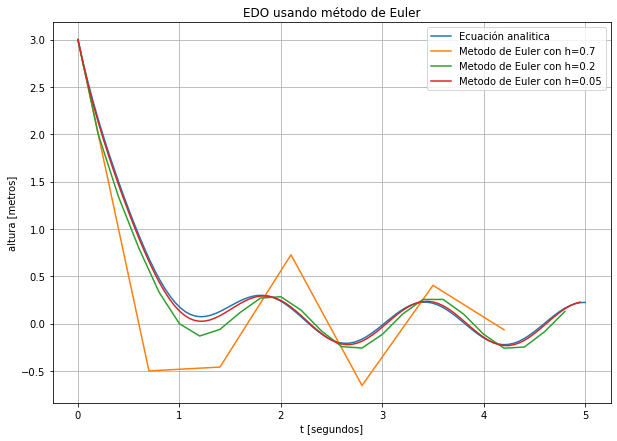

In [41]:
plot_euler()

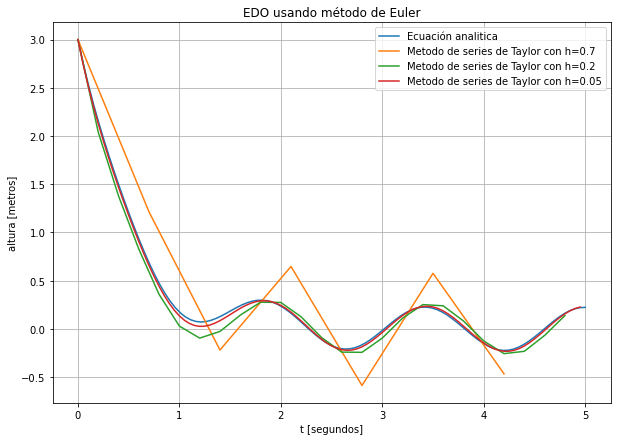

In [40]:
plot_taylor()